<a href="https://colab.research.google.com/github/Lilasrinivasreddy/300Days__MachineLearningDeepLearning/blob/main/PDF_Resume_Parser_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-utils is already the newest version (0.62.0-2ubuntu2.12).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [21]:
!pip install pdf2image
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
from pdf2image import convert_from_path
import easyocr
import numpy as np
import PIL
from PIL import ImageDraw
import spacy

In [23]:
reader = easyocr.Reader(['en'])

In [24]:
!wget /content/Amazon1.pdf

/content/Amazon1.pdf: Scheme missing.


In [26]:
images = convert_from_path('Amazon1.pdf')

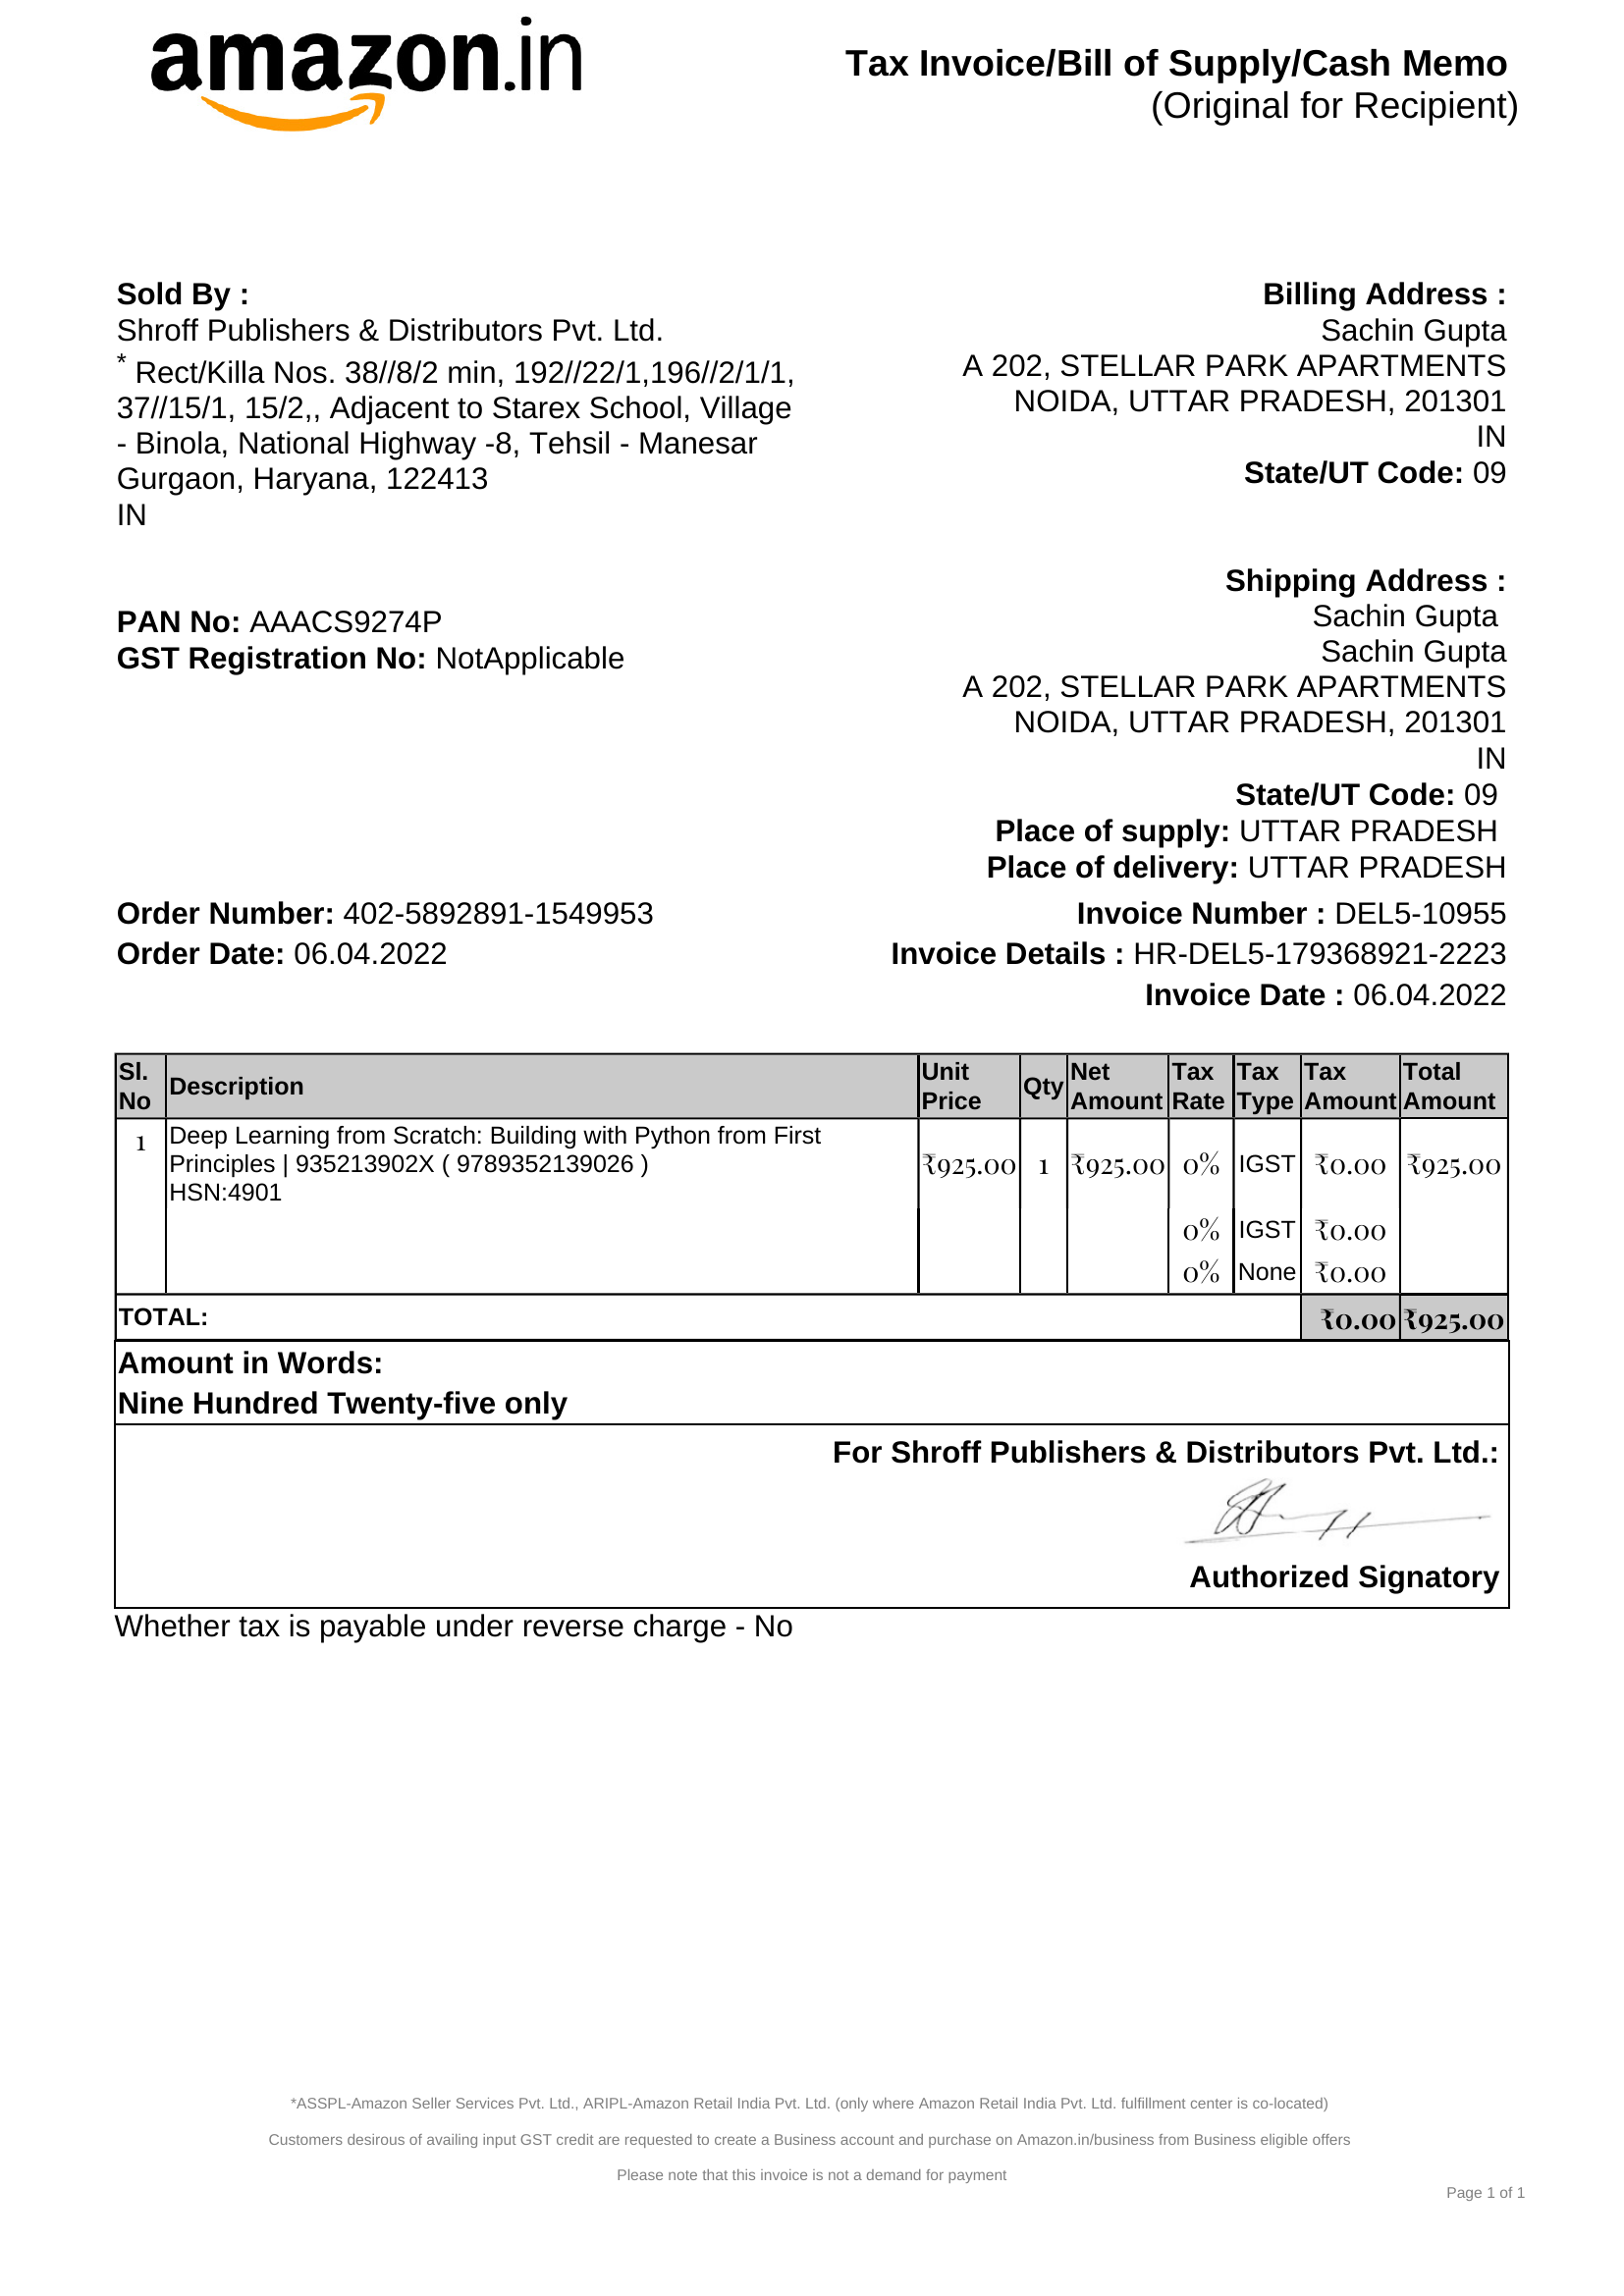

In [27]:
from IPython.display import display, Image
display(images[0])

In [28]:
bounds = reader.readtext(np.array(images[0]), min_size=0, slope_ths=0.2, ycenter_ths=0.7, height_ths=0.6, width_ths=0.8,decoder='beamsearch', beamWidth=10)
bounds

[([[146, 2], [607, 2], [607, 110], [146, 110]], 'amazonin', 0.999978757894898),
 ([[858, 41], [1542, 41], [1542, 92], [858, 92]],
  'Tax InvoicelBill of SupplyICash Memo',
  0.6399772855041075),
 ([[1166, 84], [1554, 84], [1554, 134], [1166, 134]],
  '(Original for Recipient)',
  0.9984735894484666),
 ([[115, 283], [243, 283], [243, 323], [115, 323]],
  'Sold By',
  0.9999639641755764),
 ([[1283, 279], [1521, 279], [1521, 324], [1283, 324]],
  'Billing Address',
  0.9986628592984751),
 ([[117, 319], [675, 319], [675, 355], [117, 355]],
  'Shroff Publishers & Distributors Pvt Ltd.',
  0.8189072115310855),
 ([[1341, 319], [1539, 319], [1539, 359], [1341, 359]],
  'Sachin Gupta',
  0.990200039166155),
 ([[135, 361], [815, 361], [815, 399], [135, 399]],
  'RectlKilla Nos. 38//8/2 min, 192//22/1,196//2/1/1,',
  0.6153566345653868),
 ([[981, 354], [1539, 354], [1539, 392], [981, 392]],
  'A 202, STELLAR PARK APARTMENTS',
  0.7168150539575269),
 ([[117, 399], [811, 399], [811, 439], [117, 439

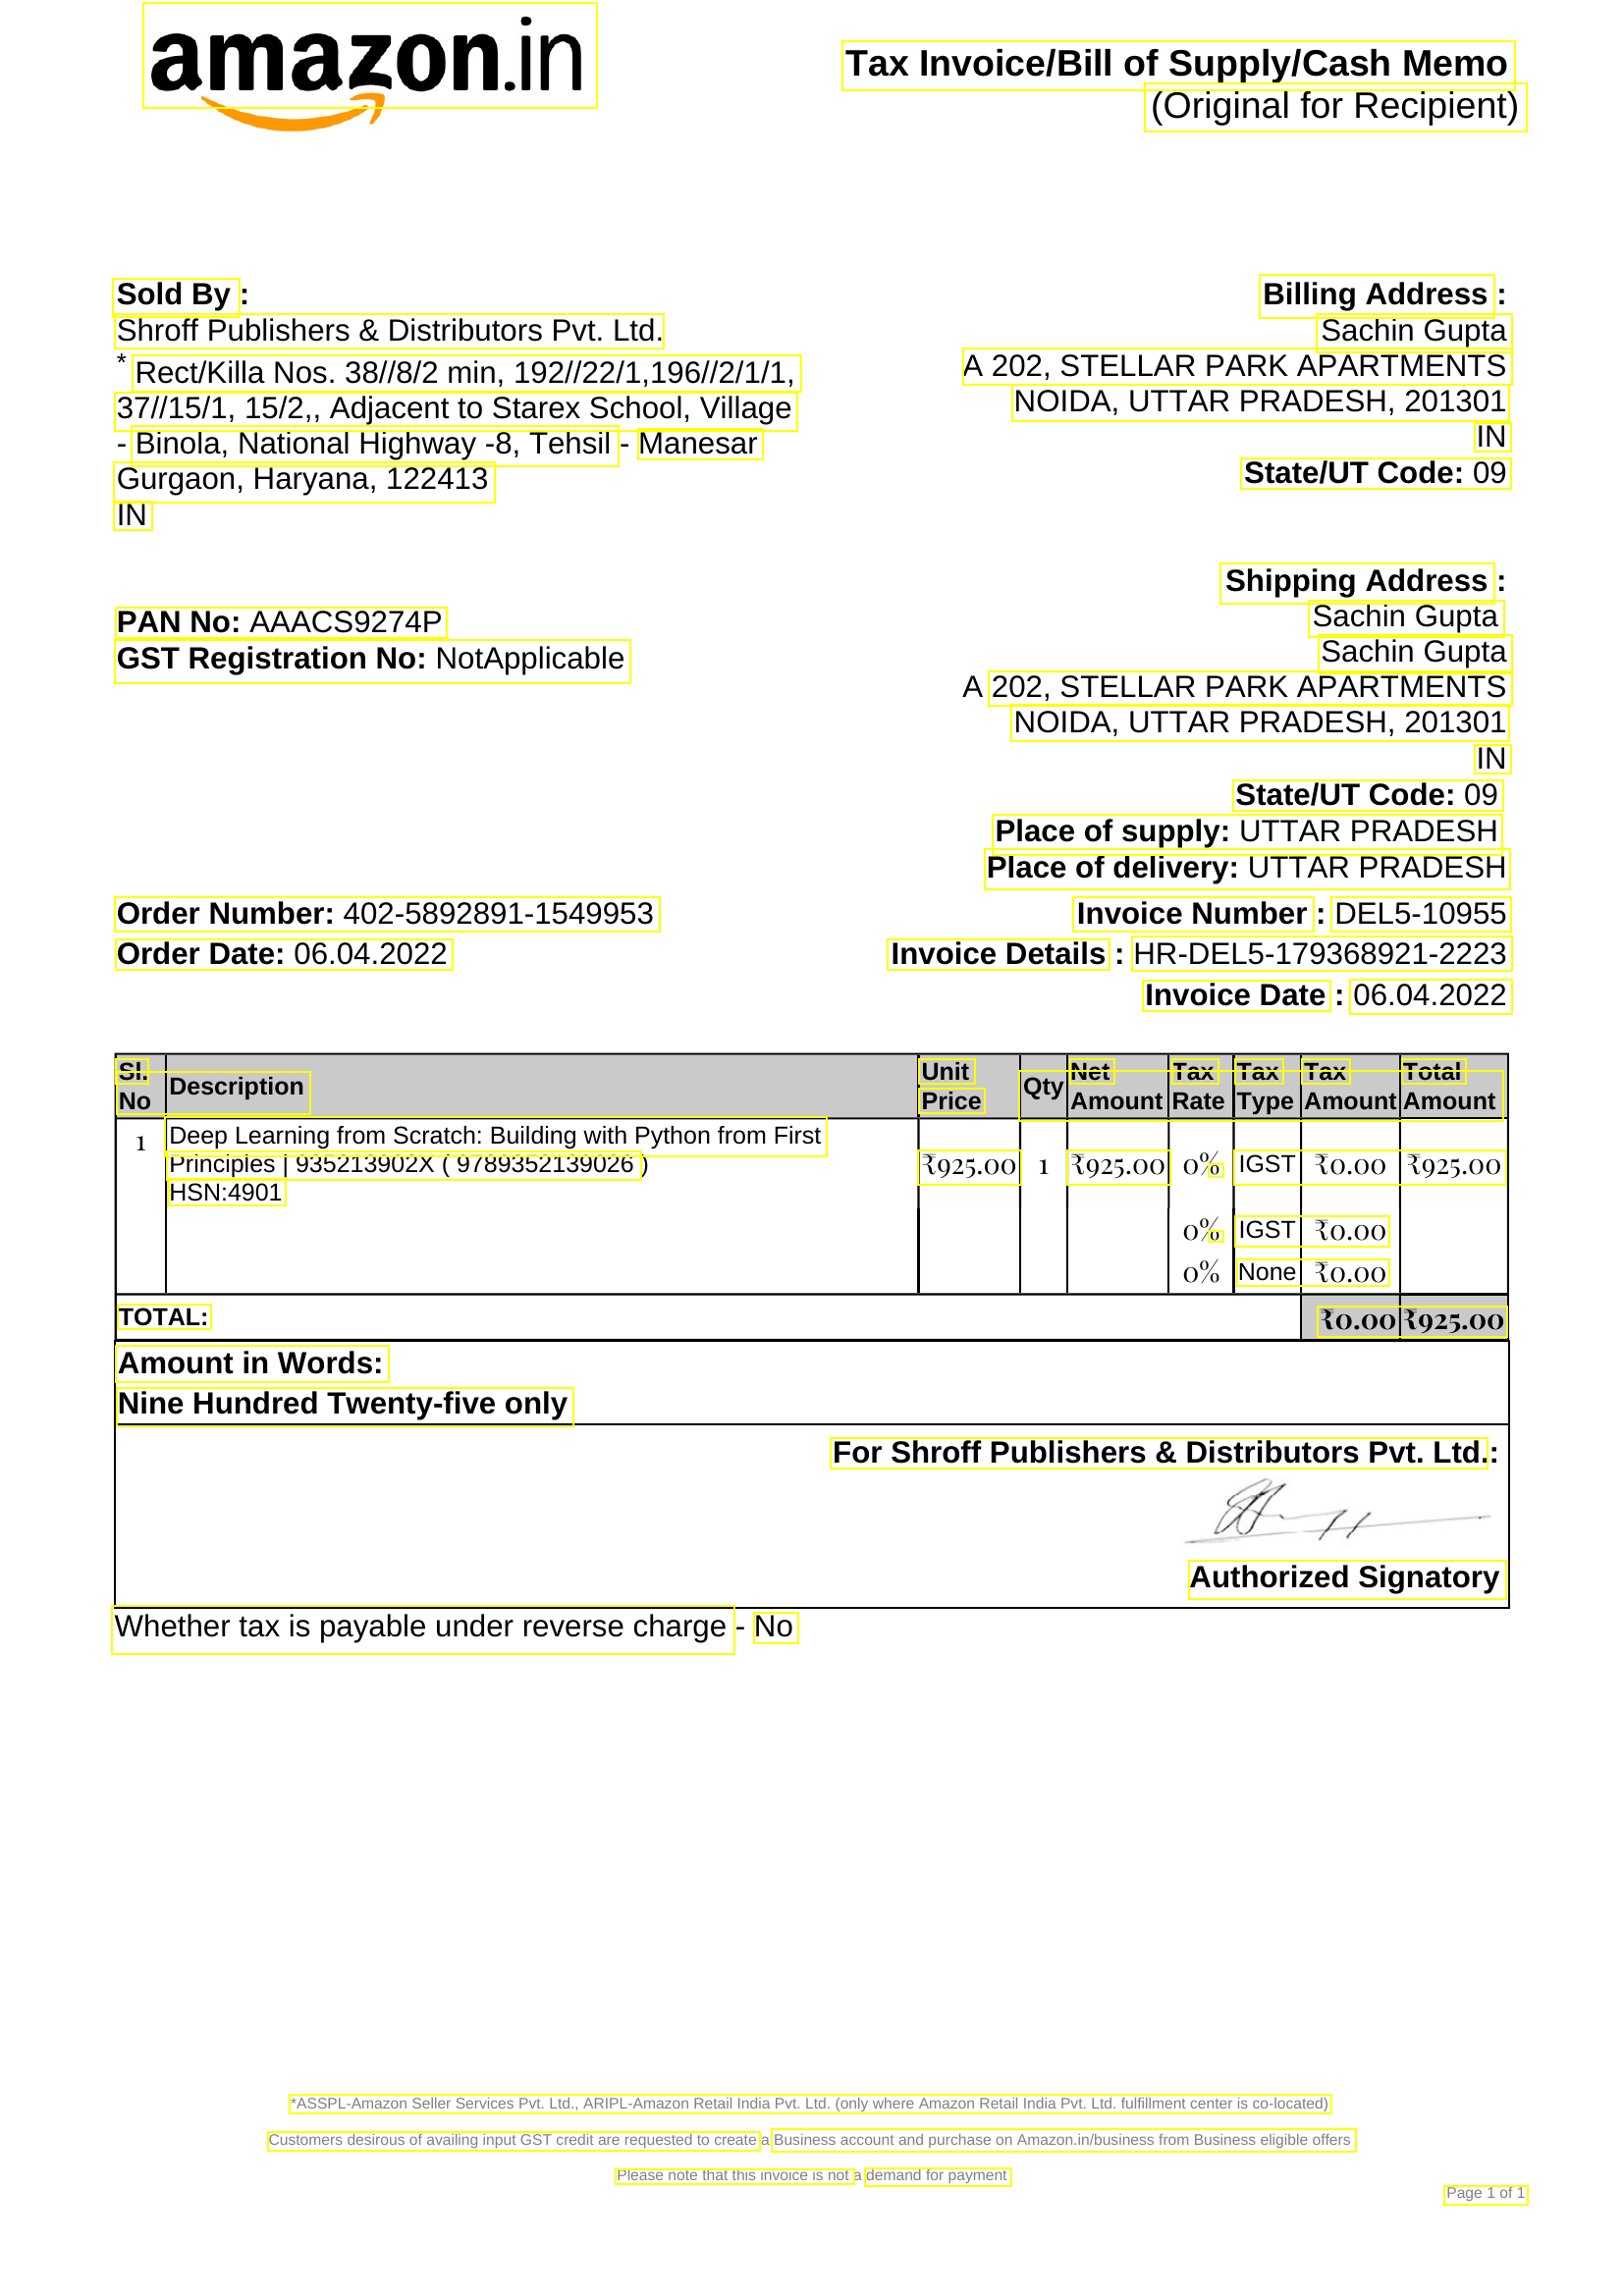

In [29]:
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(images[0], bounds)

In [30]:
bounds[1][1]

'Tax InvoicelBill of SupplyICash Memo'

In [31]:
text=''
for i in range(len(bounds)):
  text = text + bounds[i][1] +'\n'

print(text)

amazonin
Tax InvoicelBill of SupplyICash Memo
(Original for Recipient)
Sold By
Billing Address
Shroff Publishers & Distributors Pvt Ltd.
Sachin Gupta
RectlKilla Nos. 38//8/2 min, 192//22/1,196//2/1/1,
A 202, STELLAR PARK APARTMENTS
37//15/1, 15/2,, Adjacent to Starex School, Vilage
NOIDA, UTTAR PRADESH, 201301
Binola; National Highway -8, Tehsil
Manesar
IN
Gurgaon, Haryana; 122413
StatelUT Code: 09
IN
Shipping Address
PAN No: AAACS9274P
Sachin Gupta
GST Registration No: NotApplicable
Sachin Gupta
202, STELLAR PARK APARTMENTS
NOIDA, UTTAR PRADESH, 201301
IN
StatelUT Code: 09
Place of supply: UTTAR PRADESH
Place of delivery: UTTAR PRADESH
Order Number: 402-5892891-1549953
Invoice Number
DEL5-10955
Order Date: 06.04.2022
Invoice Details
HR-DEL5-179368921-2223
Invoice Date
06.04.2022
SI:
Unit
Net
Tax
Tax
Tax
Total
No |Description
Price
Qty(AmountRate TypeJAmountkAmount
Deep Learning from Scratch: Building with Python from First
Principles | 935213902X ( 9789352139026
Ro25.001
R925.001
0
IG

In [32]:
nlp=spacy.load('en_core_web_sm')

In [33]:
doc = nlp(text)

In [34]:
from spacy import displacy

displacy.render(nlp(doc.text),style='ent', jupyter=True)